In [19]:
# imports
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import sklearn.metrics as smetrics

import matplotlib.pyplot as plt

import utilities.data_utils as util
import utilities.ML_utilils as ml

In [20]:
# importing data for SVR
df = pd.read_csv('data/cleaned.csv')
X_col = df['description'].tolist()
y_col = df['annual_salary'].tolist()

In [21]:
# reduce sample size due to quickly increasing training times (2 min for 1000 samples, 12 min for 2000 samples)
SAMPLES = 1000 
# Applying some text pre-processing
X_processed = util.pre_process_descriptions(X_col)
X_featurized = ml.featurize_bow(X_processed[0:SAMPLES]).toarray()
y_featurized = y_col[0:SAMPLES]

In [9]:
# splitting the data for input into our model
TEST_SIZE = .2
X_train, X_test, y_train, y_test = train_test_split(X_featurized, y_featurized, test_size=TEST_SIZE, random_state=42)

In [10]:
#play around with C and Epsilon here
C_VALUES = [1, 10, 100, 250, 500, 750, 1000, 2000, 3000, 4000, 5000]
EPSILON_CONSTANT = 1000

In [11]:
linear_c_tweak_preds = []
for c in C_VALUES:  
    linear_model = SVR(kernel='linear', C=c, epsilon=EPSILON_CONSTANT)
    linear_model.fit(X_train, y_train)
    preds = util.predict_and_analyze(linear_model, X_test, y_test)
    linear_c_tweak_preds.append(preds)

Mean Squared Error (MSE): 2404745373.0576982
Mean Absolute Error: 37599.103307950565
Percent of postings predicted within $5,000:  6.00
Percent of postings predicted within $10,000:  11.00
Mean Squared Error (MSE): 2088861246.1042914
Mean Absolute Error: 34003.7558563996
Percent of postings predicted within $5,000:  9.50
Percent of postings predicted within $10,000:  18.00
Mean Squared Error (MSE): 1366058282.52355
Mean Absolute Error: 25391.587592372824
Percent of postings predicted within $5,000:  14.00
Percent of postings predicted within $10,000:  29.50
Mean Squared Error (MSE): 1260191168.2370033
Mean Absolute Error: 24838.941859728668
Percent of postings predicted within $5,000:  14.50
Percent of postings predicted within $10,000:  29.50
Mean Squared Error (MSE): 1247791952.3219569
Mean Absolute Error: 25380.805167613755
Percent of postings predicted within $5,000:  10.00
Percent of postings predicted within $10,000:  31.00
Mean Squared Error (MSE): 1278422235.0964532
Mean Absolu

In [12]:
poly_c_tweak_preds = []
for c in C_VALUES:  
    poly_model = SVR(kernel='poly', degree=2, C=c, epsilon=EPSILON_CONSTANT, verbose=True)
    poly_model.fit(X_train, y_train)
    preds = util.predict_and_analyze(poly_model, X_test, y_test)
    poly_c_tweak_preds.append(preds)

[LibSVM]*
optimization finished, #iter = 403
obj = -29496489.637295, rho = -81749.821223
nSV = 788, nBSV = 788
Mean Squared Error (MSE): 2449442973.195196
Mean Absolute Error: 38037.778205078255
Percent of postings predicted within $5,000:  5.50
Percent of postings predicted within $10,000:  12.00
[LibSVM]*
optimization finished, #iter = 403
obj = -294891664.929541, rho = -81748.212229
nSV = 788, nBSV = 788
Mean Squared Error (MSE): 2448589902.1700115
Mean Absolute Error: 38029.48205078257
Percent of postings predicted within $5,000:  5.50
Percent of postings predicted within $10,000:  12.00
[LibSVM]*
optimization finished, #iter = 403
obj = -2941593504.954131, rho = -81649.100689
nSV = 788, nBSV = 788
Mean Squared Error (MSE): 2441339084.0895023
Mean Absolute Error: 37938.2183479133
Percent of postings predicted within $5,000:  5.50
Percent of postings predicted within $10,000:  12.00
[LibSVM]*
optimization finished, #iter = 421
obj = -7323711067.524332, rho = -81593.794244
nSV = 790,

In [13]:
linear_ctweak_R2 = util.get_evaluation_metric(smetrics.r2_score, linear_c_tweak_preds, y_test)
linear_ctweak_mae = util.get_evaluation_metric(smetrics.mean_absolute_error, linear_c_tweak_preds, y_test)
linear_ctweak_mse = util.get_evaluation_metric(smetrics.mean_squared_error, linear_c_tweak_preds, y_test)
linear_ctweak_5000_pct = util.get_evaluation_metric(util.percent_of_predictions_in_range, linear_c_tweak_preds, y_test, func_args=5000)
linear_ctweak_10000_pct = util.get_evaluation_metric(util.percent_of_predictions_in_range, linear_c_tweak_preds, y_test, func_args=10000)
linear_ctweak_15000_pct = util.get_evaluation_metric(util.percent_of_predictions_in_range, linear_c_tweak_preds, y_test, func_args=15000)

In [14]:
poly_ctweak_R2 = util.get_evaluation_metric(smetrics.r2_score, poly_c_tweak_preds, y_test)
poly_ctweak_mae = util.get_evaluation_metric(smetrics.mean_absolute_error, poly_c_tweak_preds, y_test)
poly_ctweak_mse = util.get_evaluation_metric(smetrics.mean_squared_error, poly_c_tweak_preds, y_test)
poly_ctweak_5000_pct = util.get_evaluation_metric(util.percent_of_predictions_in_range, poly_c_tweak_preds, y_test, func_args=5000)
poly_ctweak_10000_pct = util.get_evaluation_metric(util.percent_of_predictions_in_range, poly_c_tweak_preds, y_test, func_args=10000)
poly_ctweak_15000_pct = util.get_evaluation_metric(util.percent_of_predictions_in_range, poly_c_tweak_preds, y_test, func_args=15000)

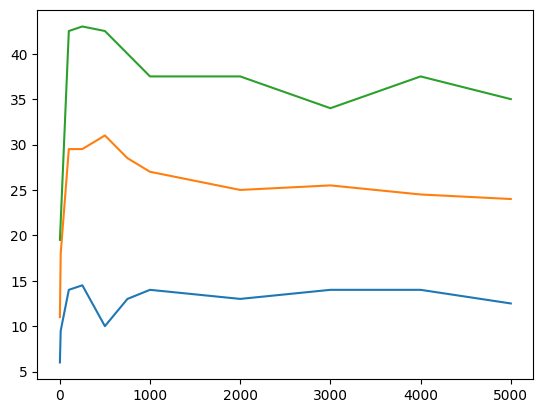

In [15]:
plt.plot(C_VALUES, linear_ctweak_5000_pct)
plt.plot(C_VALUES, linear_ctweak_10000_pct)
plt.plot(C_VALUES, linear_ctweak_15000_pct)

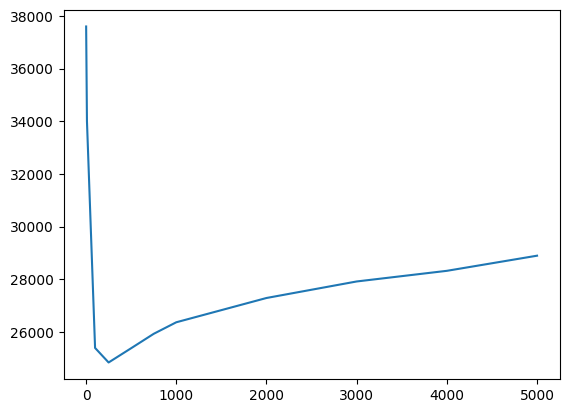

In [16]:
plt.plot(C_VALUES, linear_ctweak_mae)

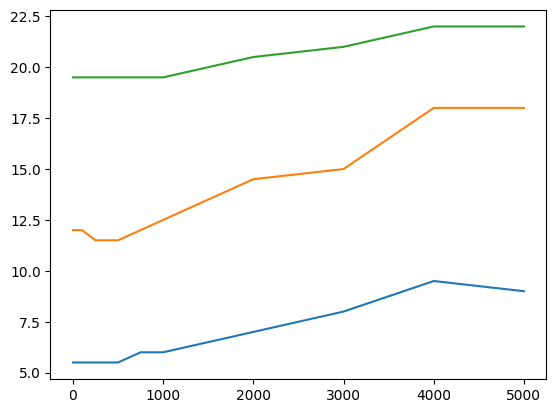

In [17]:
plt.plot(C_VALUES, poly_ctweak_5000_pct)
plt.plot(C_VALUES, poly_ctweak_10000_pct)
plt.plot(C_VALUES, poly_ctweak_15000_pct)

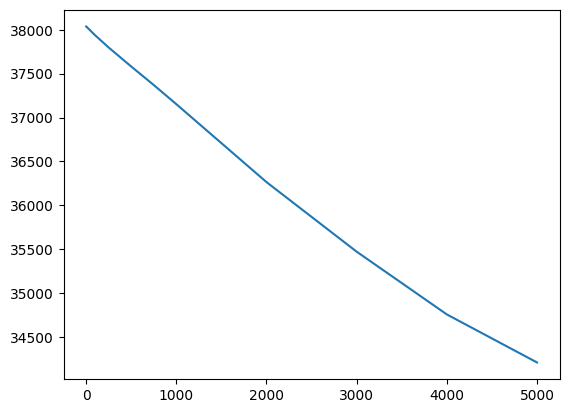

In [18]:
plt.plot(C_VALUES, poly_ctweak_mae)